In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Basic Reproduction Number 
R_0 = 3

# Population inputs (Size of poplution): 100 up
N  = 7000

# Transmission Times (Length of incubation period) : unit day
Tinc = 50

# Duration patient is infectious
Tinf = 7.6

# Number of the end date
Tend = 700

#-------------------------------------------------------------------------------------------------------------

# Calculate the effective contact rate of the disease
beta = R_0/Tinf

# Build a grid of Time
t = np.linspace(start = 0, stop = Tend, num = Tend)

# Initial number of infected and recovered individuals, E_i, I_i and R_i.
Ei, Ii, Ri = 1, 0 ,0

# Everyone else, S_i, is susceptible to infection initially.
Si = N - Ii - Ri - Ei
# Si=200

In [3]:
# Ordinary differential equation of SEIR
def ODE_SEIR(y, t, N, beta, Tinc, Tinf):
    S, E, I, R = y
    dSdt = -(beta*I*S/N)
    dEdt = (beta*I*S/N) - (E/Tinc)
    dIdt = (E/Tinc) - (I/Tinf)
    dRdt = I/Tinf
    return dSdt, dEdt, dIdt, dRdt

In [4]:
# Initial conditions vector
yi = Si, Ei, Ii, Ri

In [5]:
# Integrate ODE_SEIR
ret = odeint(ODE_SEIR, yi, t, args=(N, beta, Tinc, Tinf))
S, E, I, R = ret.T

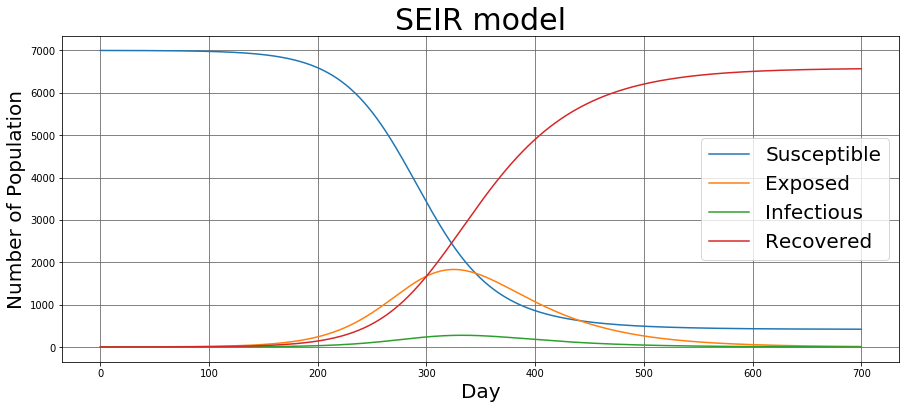

In [6]:
fig= plt.figure(figsize=(15,6))

plt.plot(t,S, label='Susceptible')
plt.plot(t,E, label='Exposed')
plt.plot(t,I, label='Infectious')
plt.plot(t,R, label='Recovered')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.legend(loc="center right",fontsize=20)
plt.ylabel('Number of Population',fontsize=20)
plt.xlabel("Day",fontsize=20)
plt.title("SEIR model",fontsize=30)

plt.show()